This notebook is used to create and save datasets for 1D regression task. 

In [1]:
from myimports import *

In [2]:
datadir = './datasets/'

In [3]:
#function of interest
def f(x):
    return x*x*x


In [4]:
def create_dataset(Ndata=1000, xl=-4, xh =4, mu=0, sigma=3):
    """
    :param Ndata: dataset size
    :param xl: lowest x val of the created data
    :param xh: highest x val
    
    :return X_npa:    inputs
    :return Y_npa:    labels (noisy observations)
    :return Y_gt_npa: true underlying function values
    """
    X_npa = np.zeros((Ndata))    #input dataset
    Y_npa = np.zeros((Ndata))    #output dataset -- noisy observations
    Y_gt_npa = np.zeros((Ndata)) #ground truth outputs

    #create the dataset
    for i in range(Ndata):
        #sample x between the training boundaries [xl,xh]
        x = xl+np.random.rand()*(xh-xl)
        X_npa[i] = x

        #calculate the ground truth output
        y_gt = f(x)
        Y_gt_npa[i] = y_gt
    
    # select the noise model and create the noise
    eps= mu + sigma*np.random.randn(Ndata)

    #add observation noise
    Y_npa = Y_gt_npa+eps
    
    return X_npa, Y_npa, Y_gt_npa

In [5]:
# populate gt function vals
x = np.linspace(-6,6,100,endpoint=True)
y = f(x)

In [6]:
# set dataset sizes
Ndata_val = 500
Ndata_train_list = [10,20,40,80,160,320, 640, 1280, 2560]

In [7]:
#create a validation dataset
X_val, Y_val, Y_val_gt = create_dataset(Ndata=Ndata_val)
print('X_val.shape:\t', X_val.shape)
print('Y_val.shape:\t', Y_val.shape)
print('Y_val_gt.shape:\t', Y_val_gt.shape)

X_val.shape:	 (500,)
Y_val.shape:	 (500,)
Y_val_gt.shape:	 (500,)


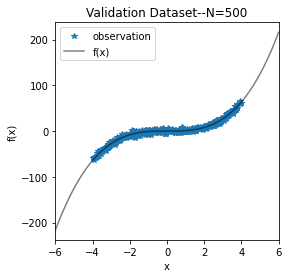

In [8]:
#illustrate the validation dataset
fig = plt.figure(figsize=(4,4))
plt.plot(X_val, Y_val,'*', label='observation')
plt.title('Validation Dataset'+'--'+'N='+str(Ndata_val))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([-6,6])

plt.plot(x, y, 'k', label='f(x)', alpha = 0.5)
plt.legend()
plt.show()

In [9]:
#create the validation dataset dict
val_data_dict = {'X':X_val, 'Y': Y_val, 'Y_gt':Y_val_gt}

In [10]:
# save the validation dataset dict
with open(datadir+'valdata_dict_'+str(Ndata_val)+'.pickle', 'wb') as file:      
    pickle.dump(val_data_dict, file)

In [11]:
#create and save the training datasets
for Ndata_train in Ndata_train_list:
    #create the train dataset and its dict
    X_train, Y_train, Y_train_gt = create_dataset(Ndata=Ndata_train)
    train_data_dict = {'X':X_train, 'Y': Y_train, 'Y_gt':Y_train_gt}
    dict_fpath = datadir+'traindata_dict_'+str(Ndata_train)+'.pickle'
    
    #save the dict
    with open(dict_fpath, 'wb') as file:
        pickle.dump(train_data_dict, file)
    

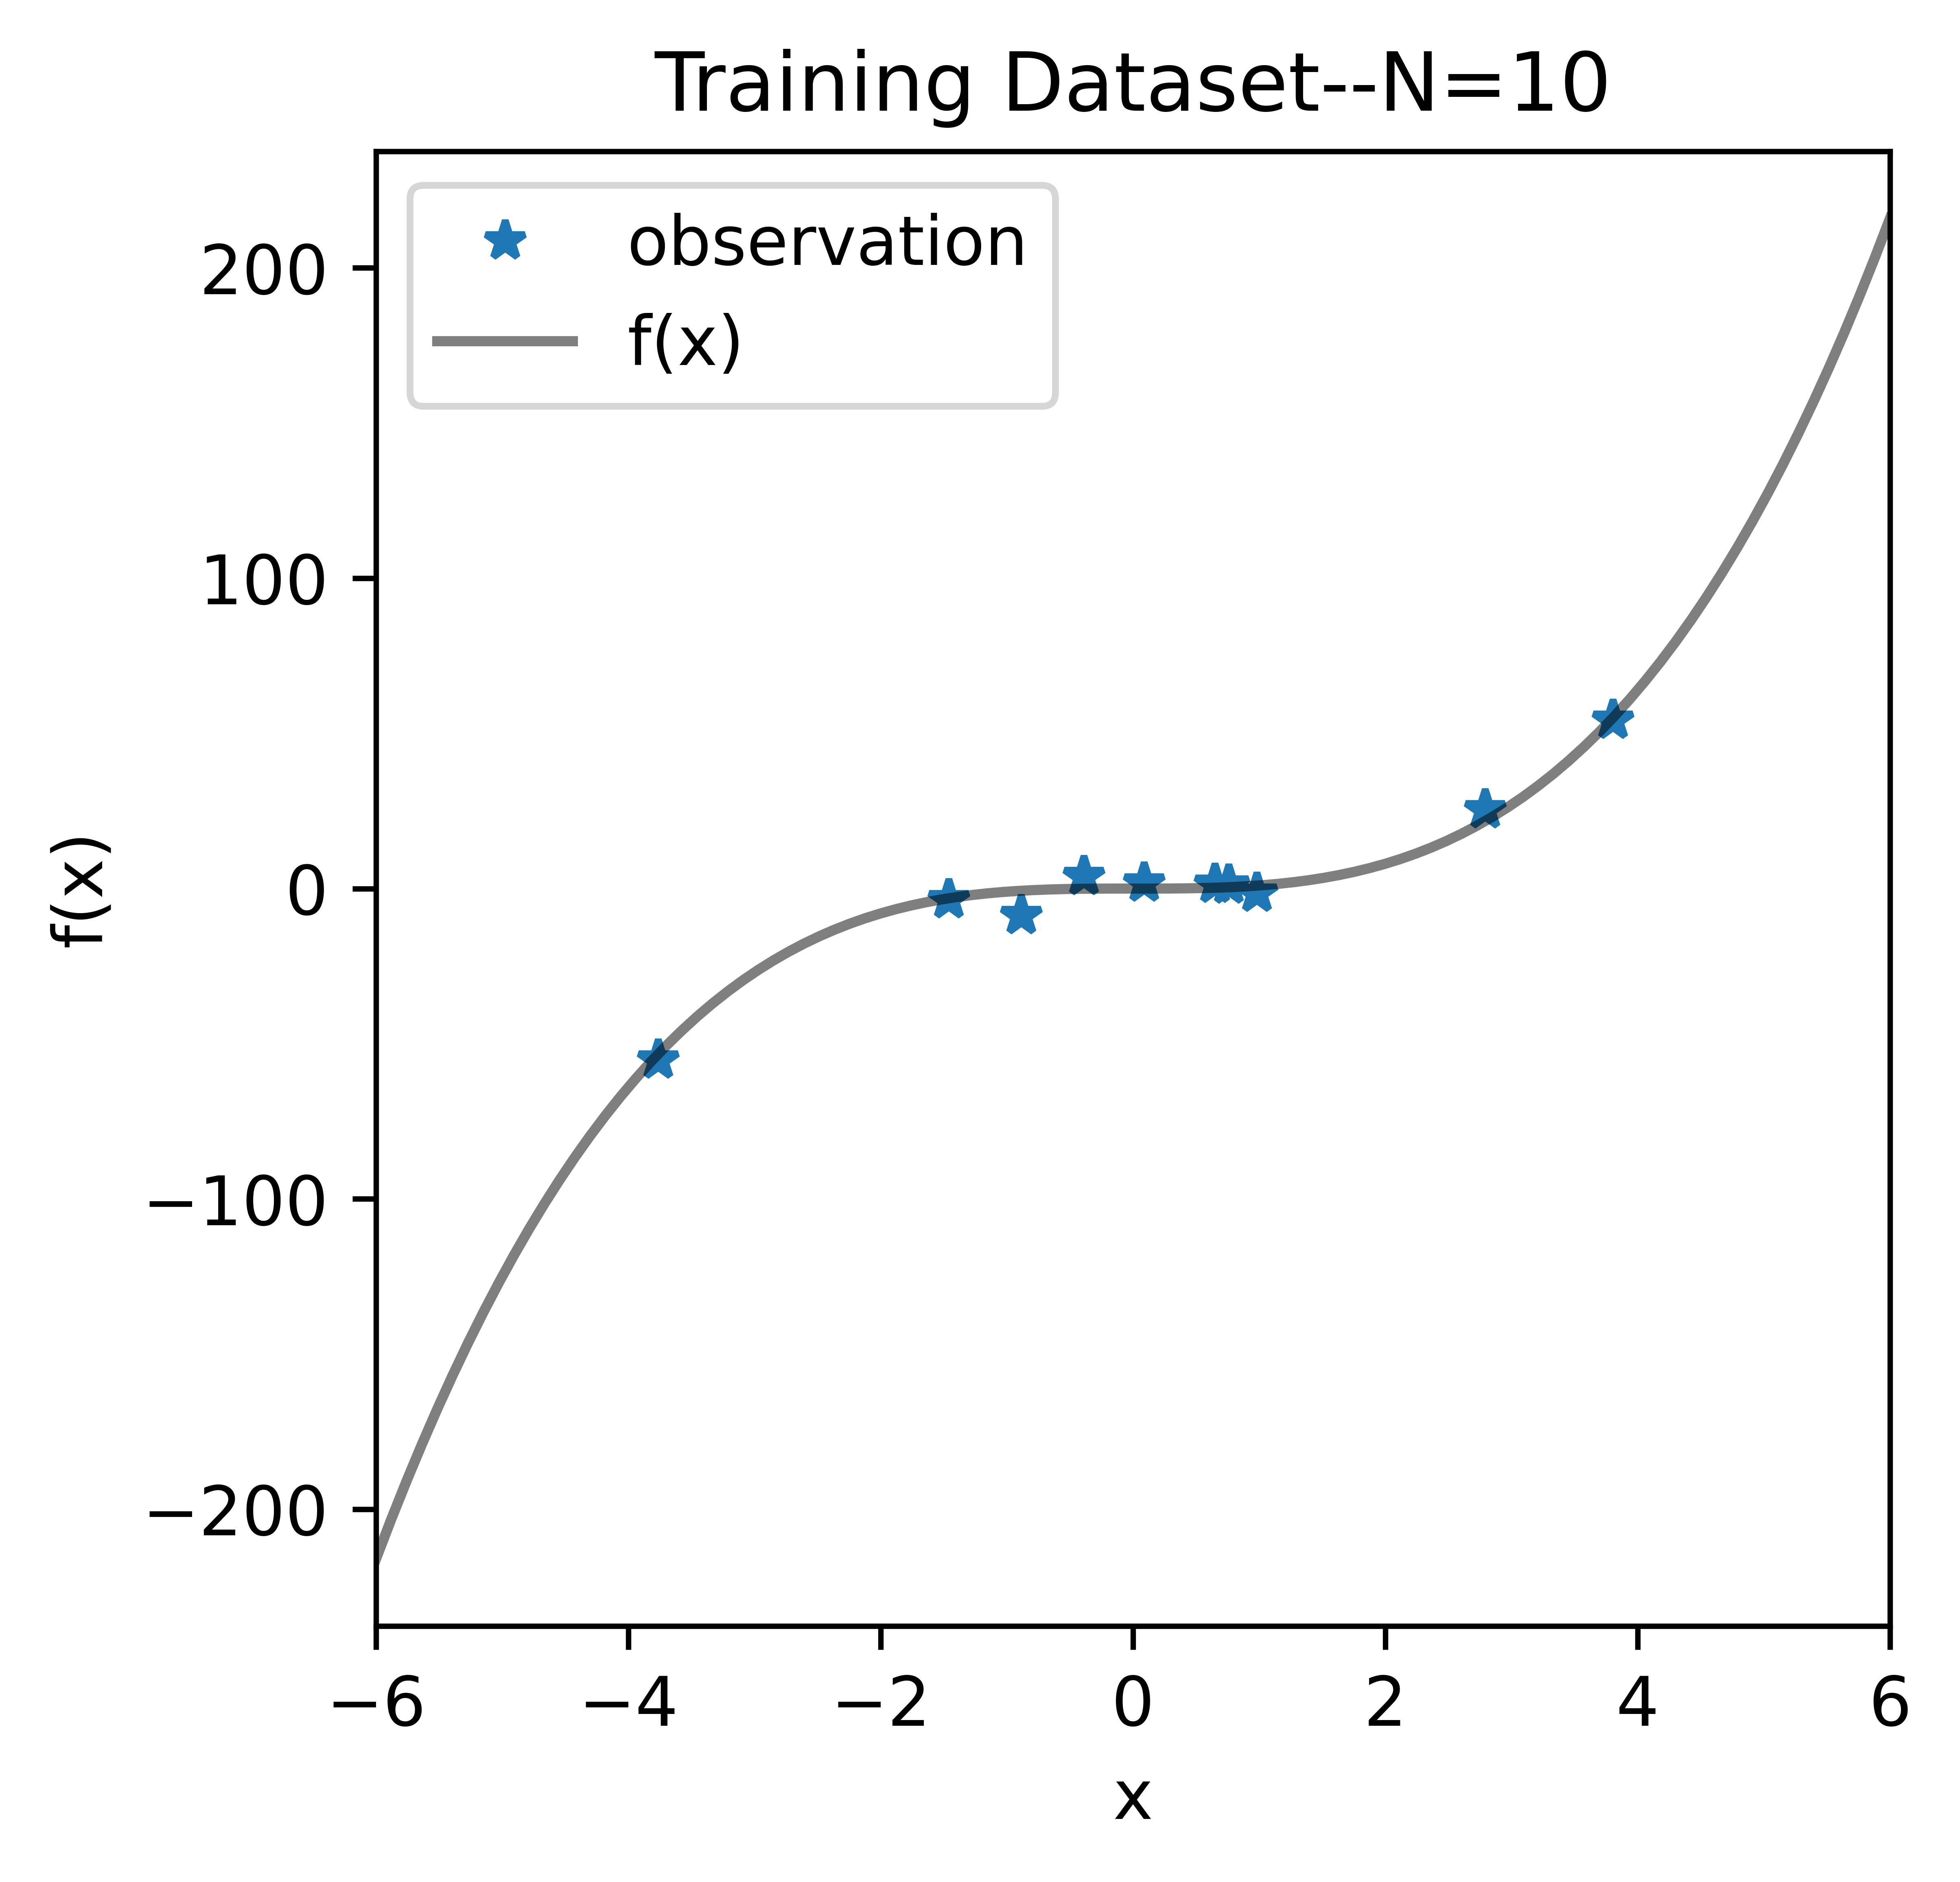

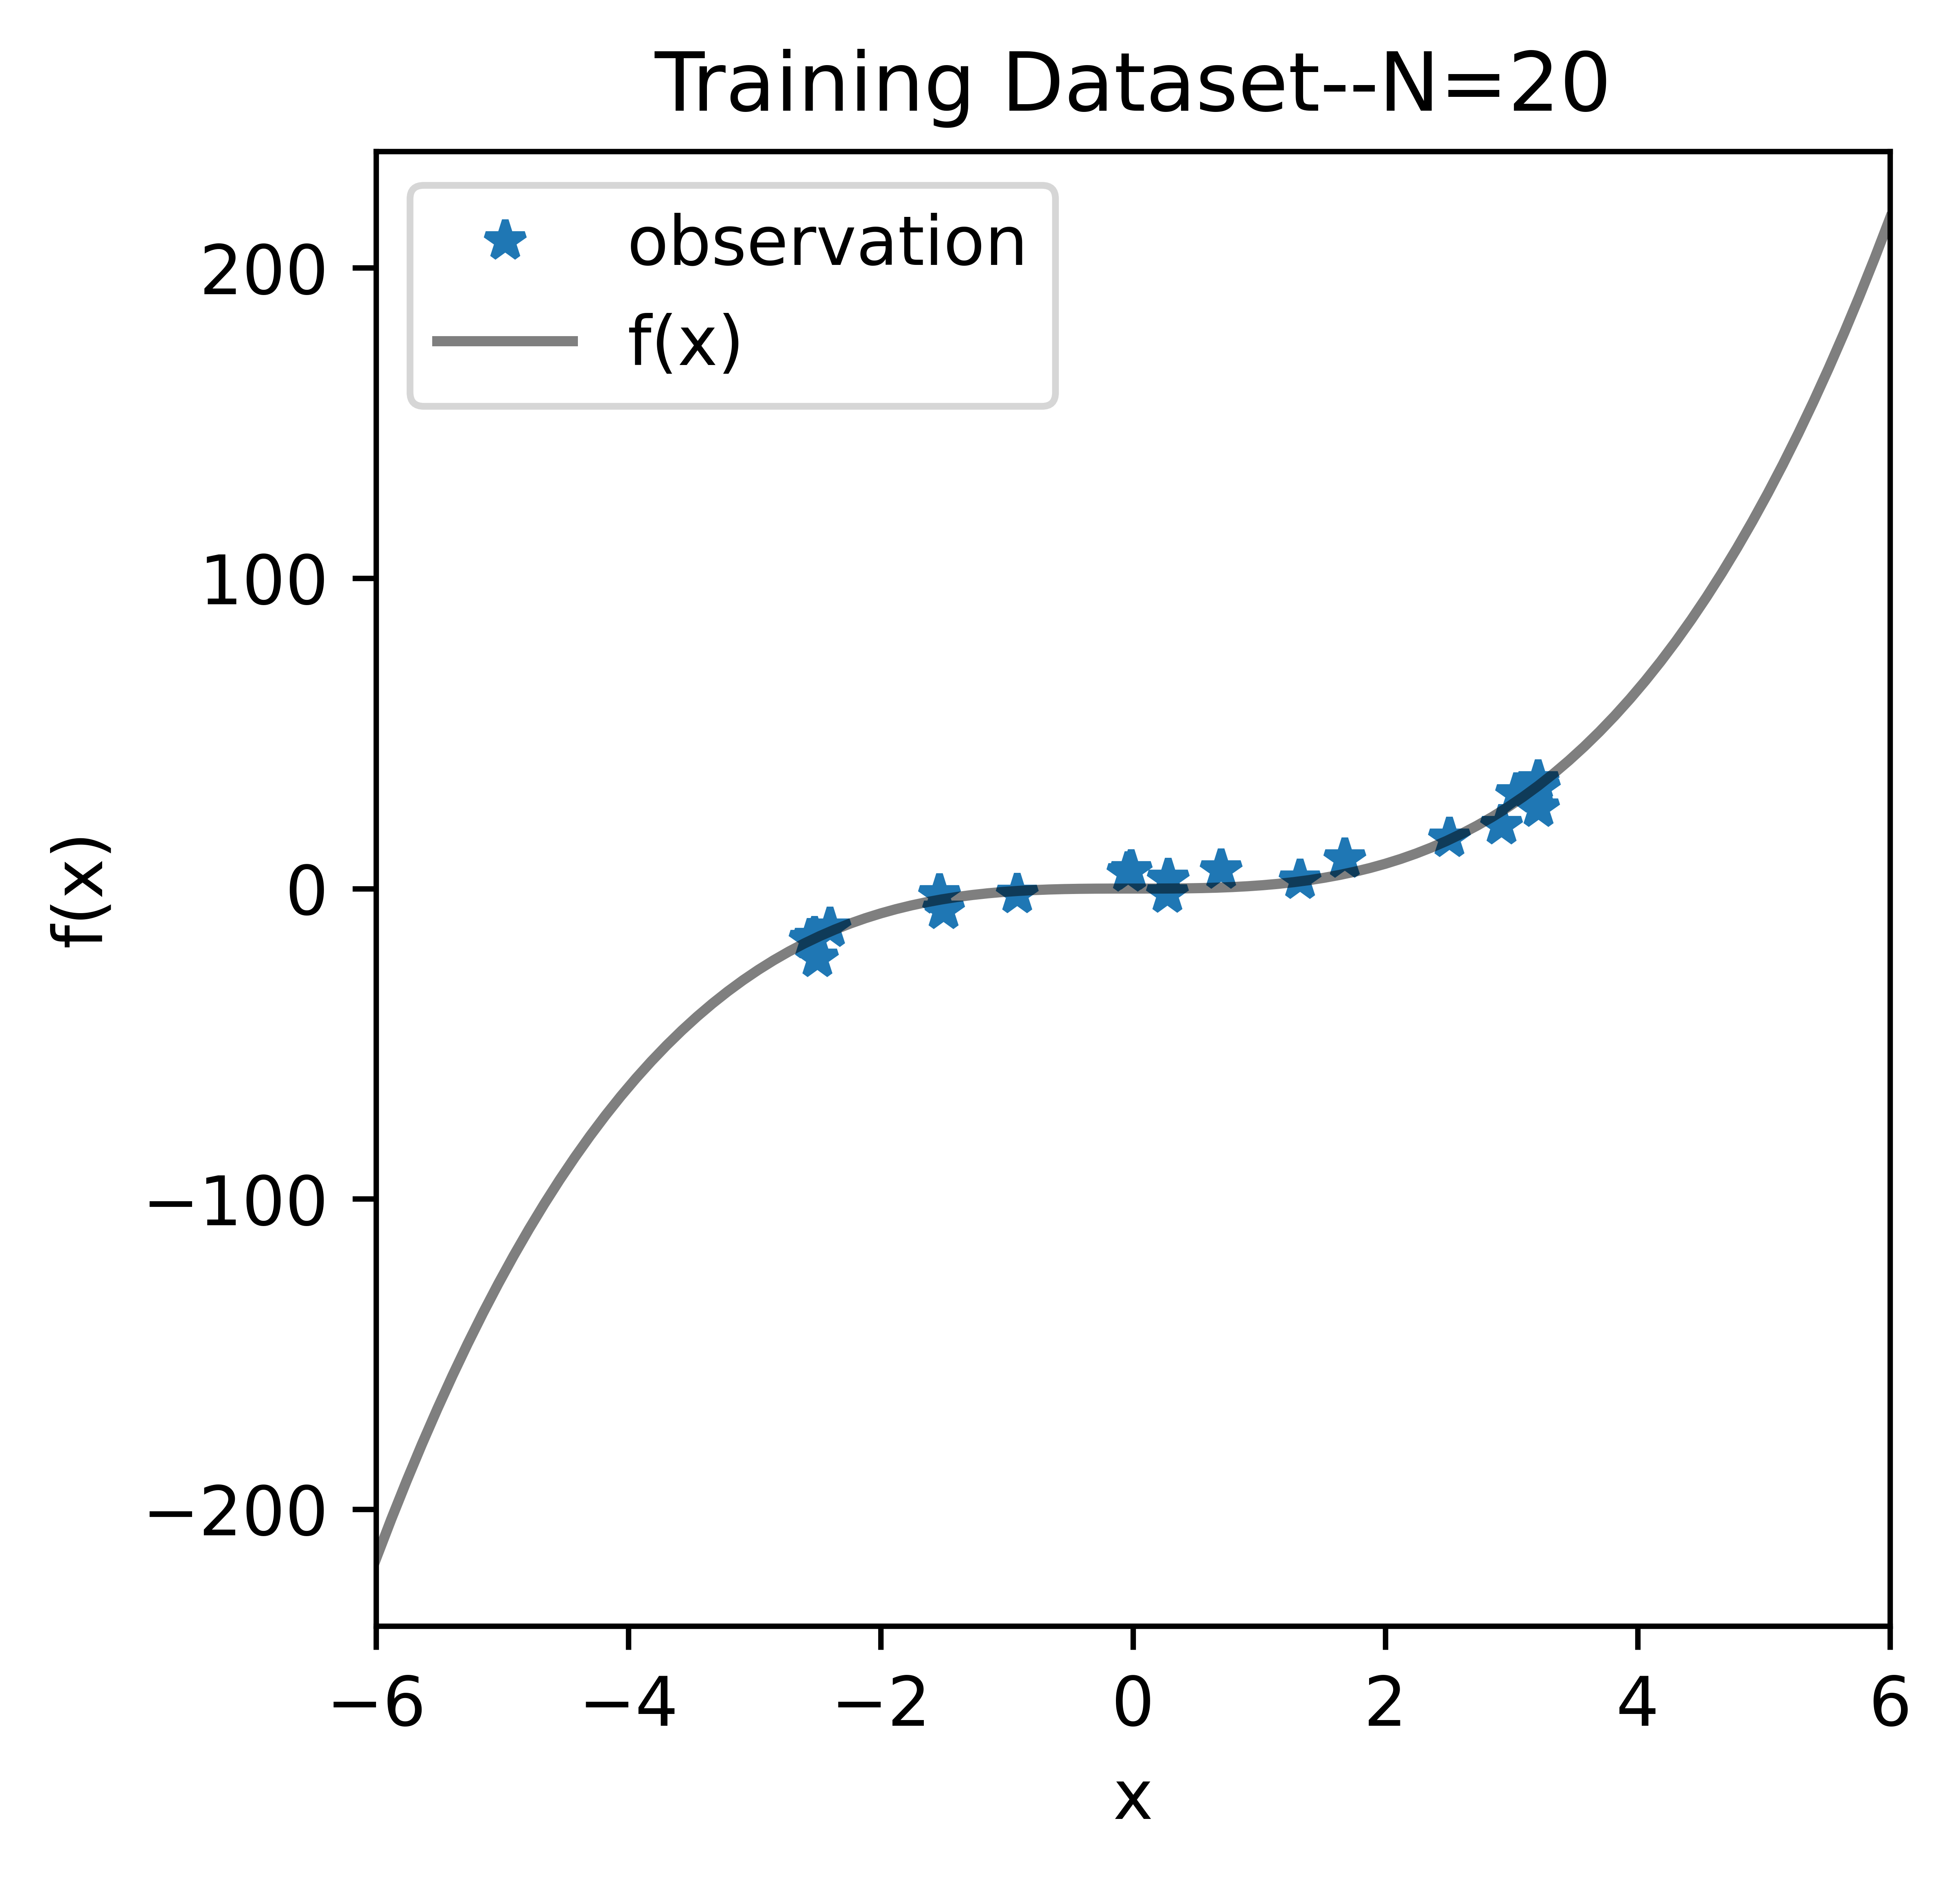

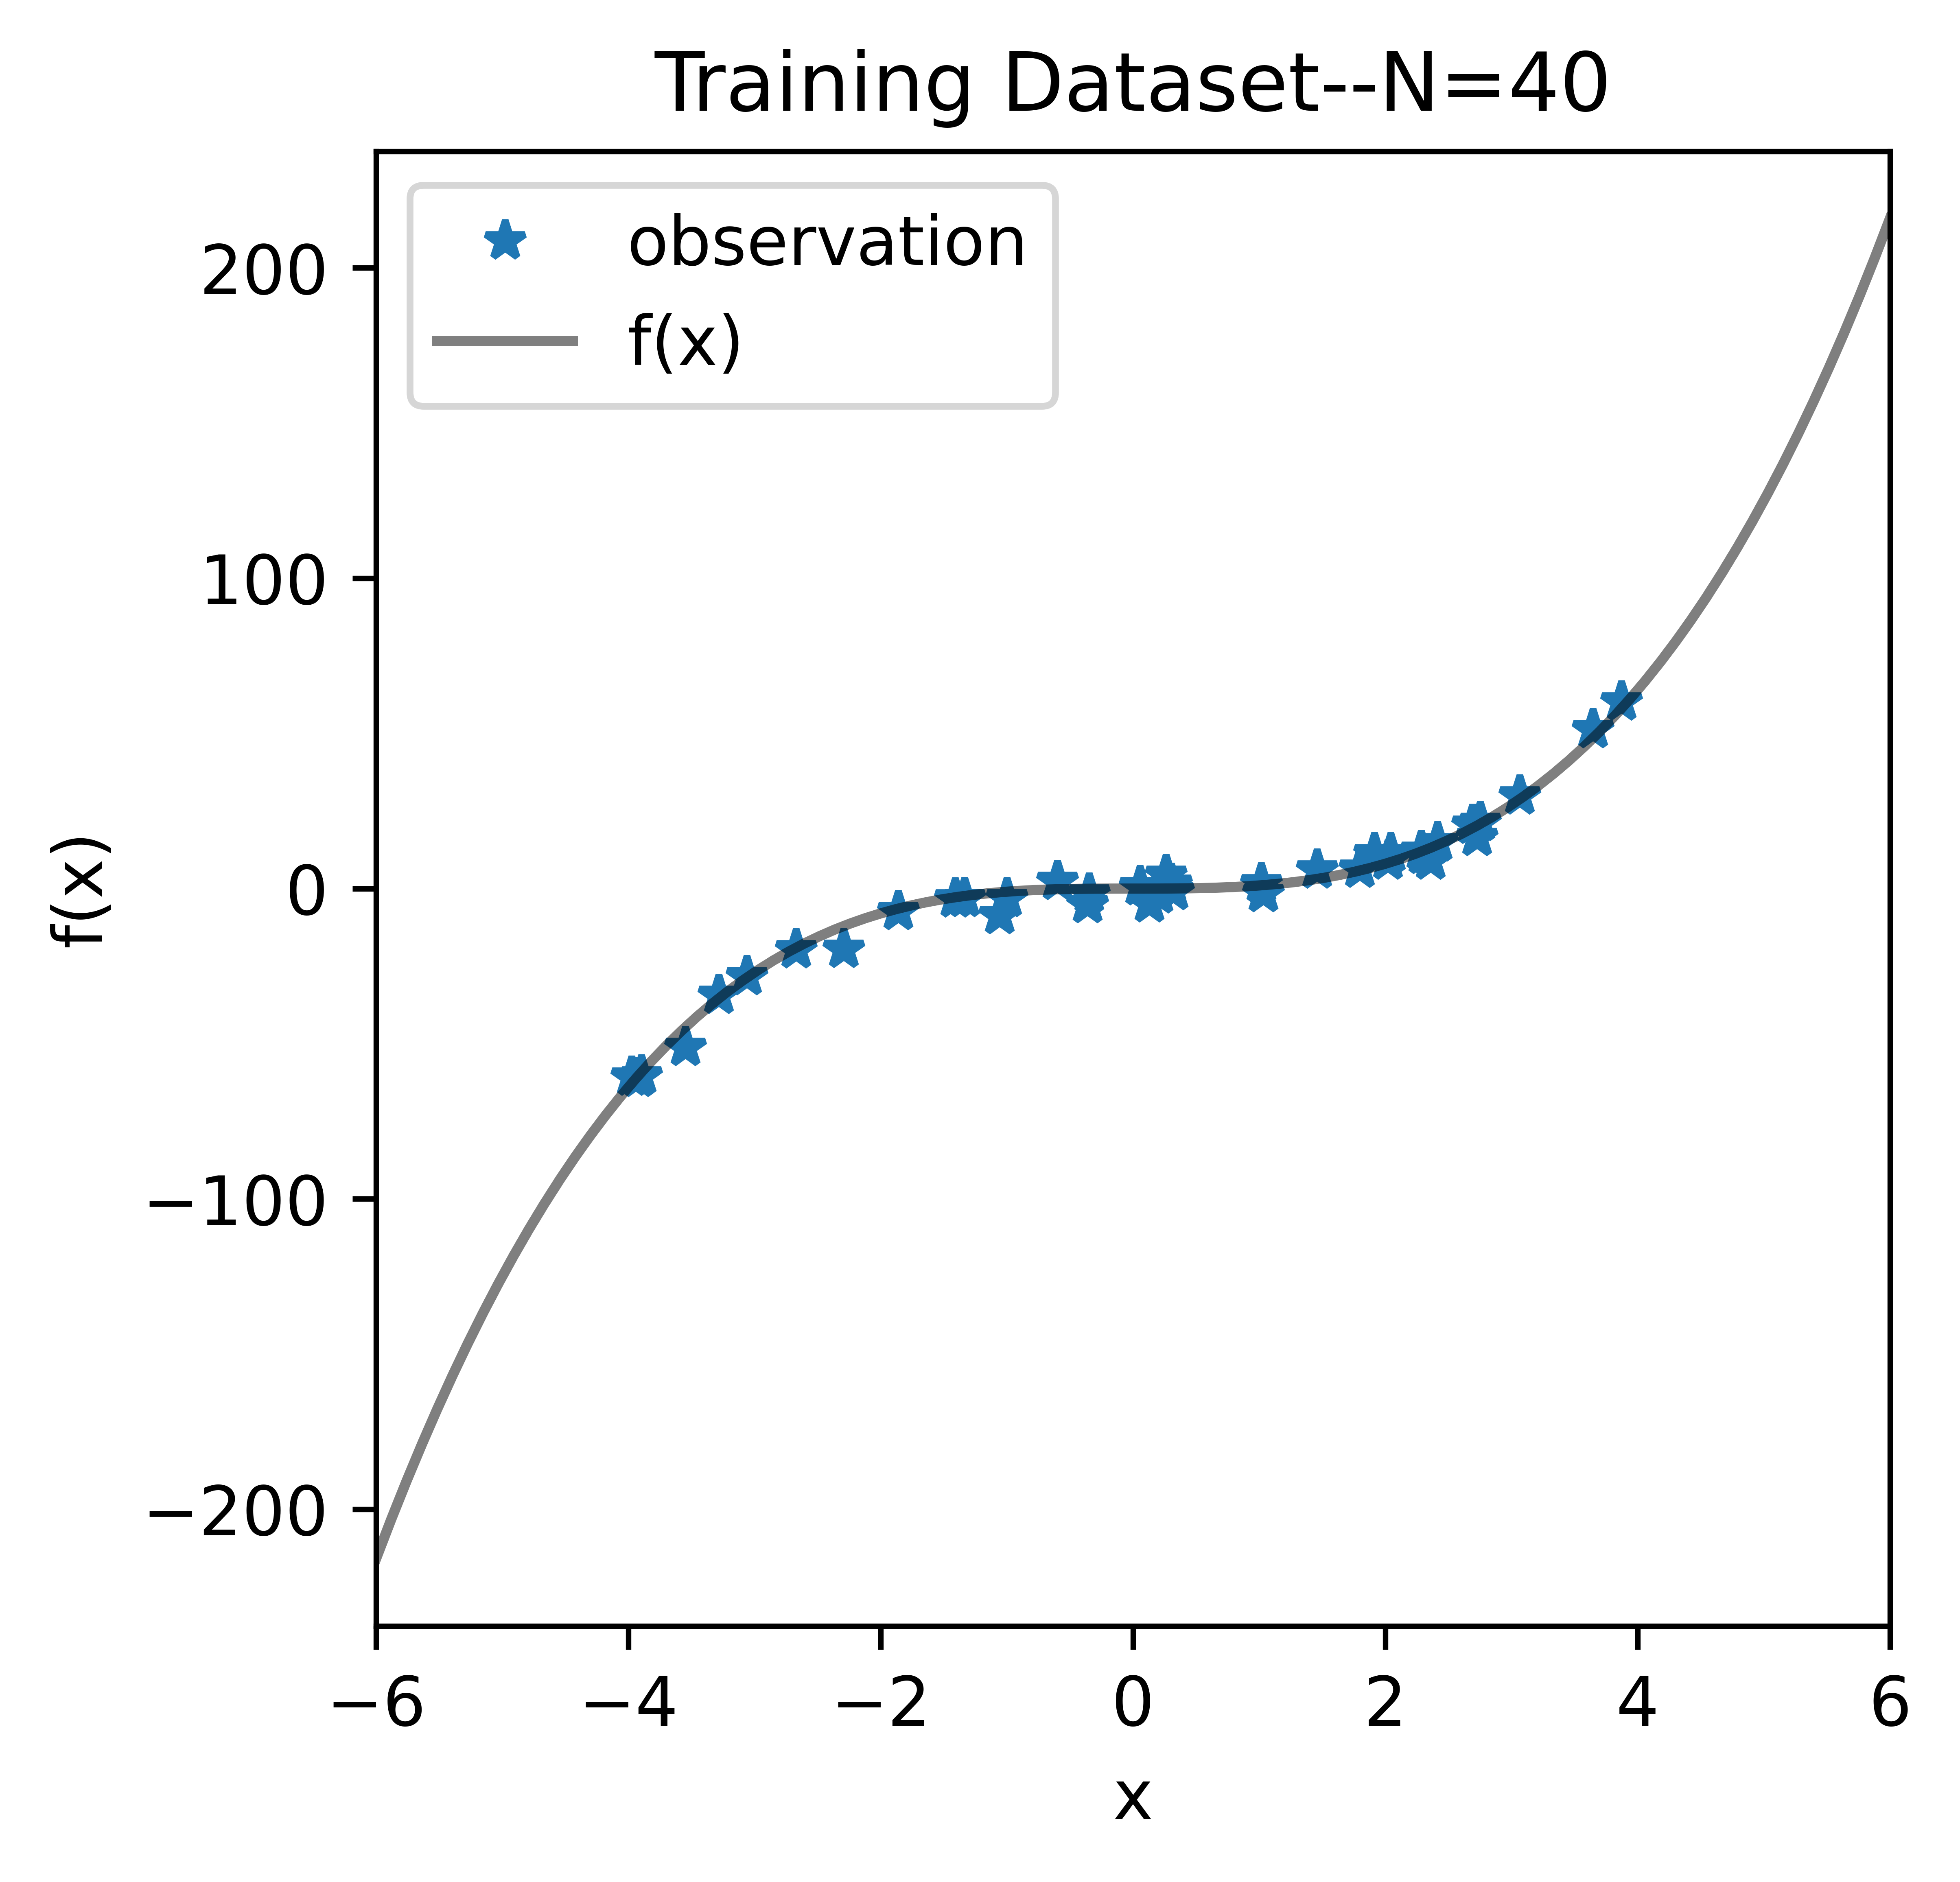

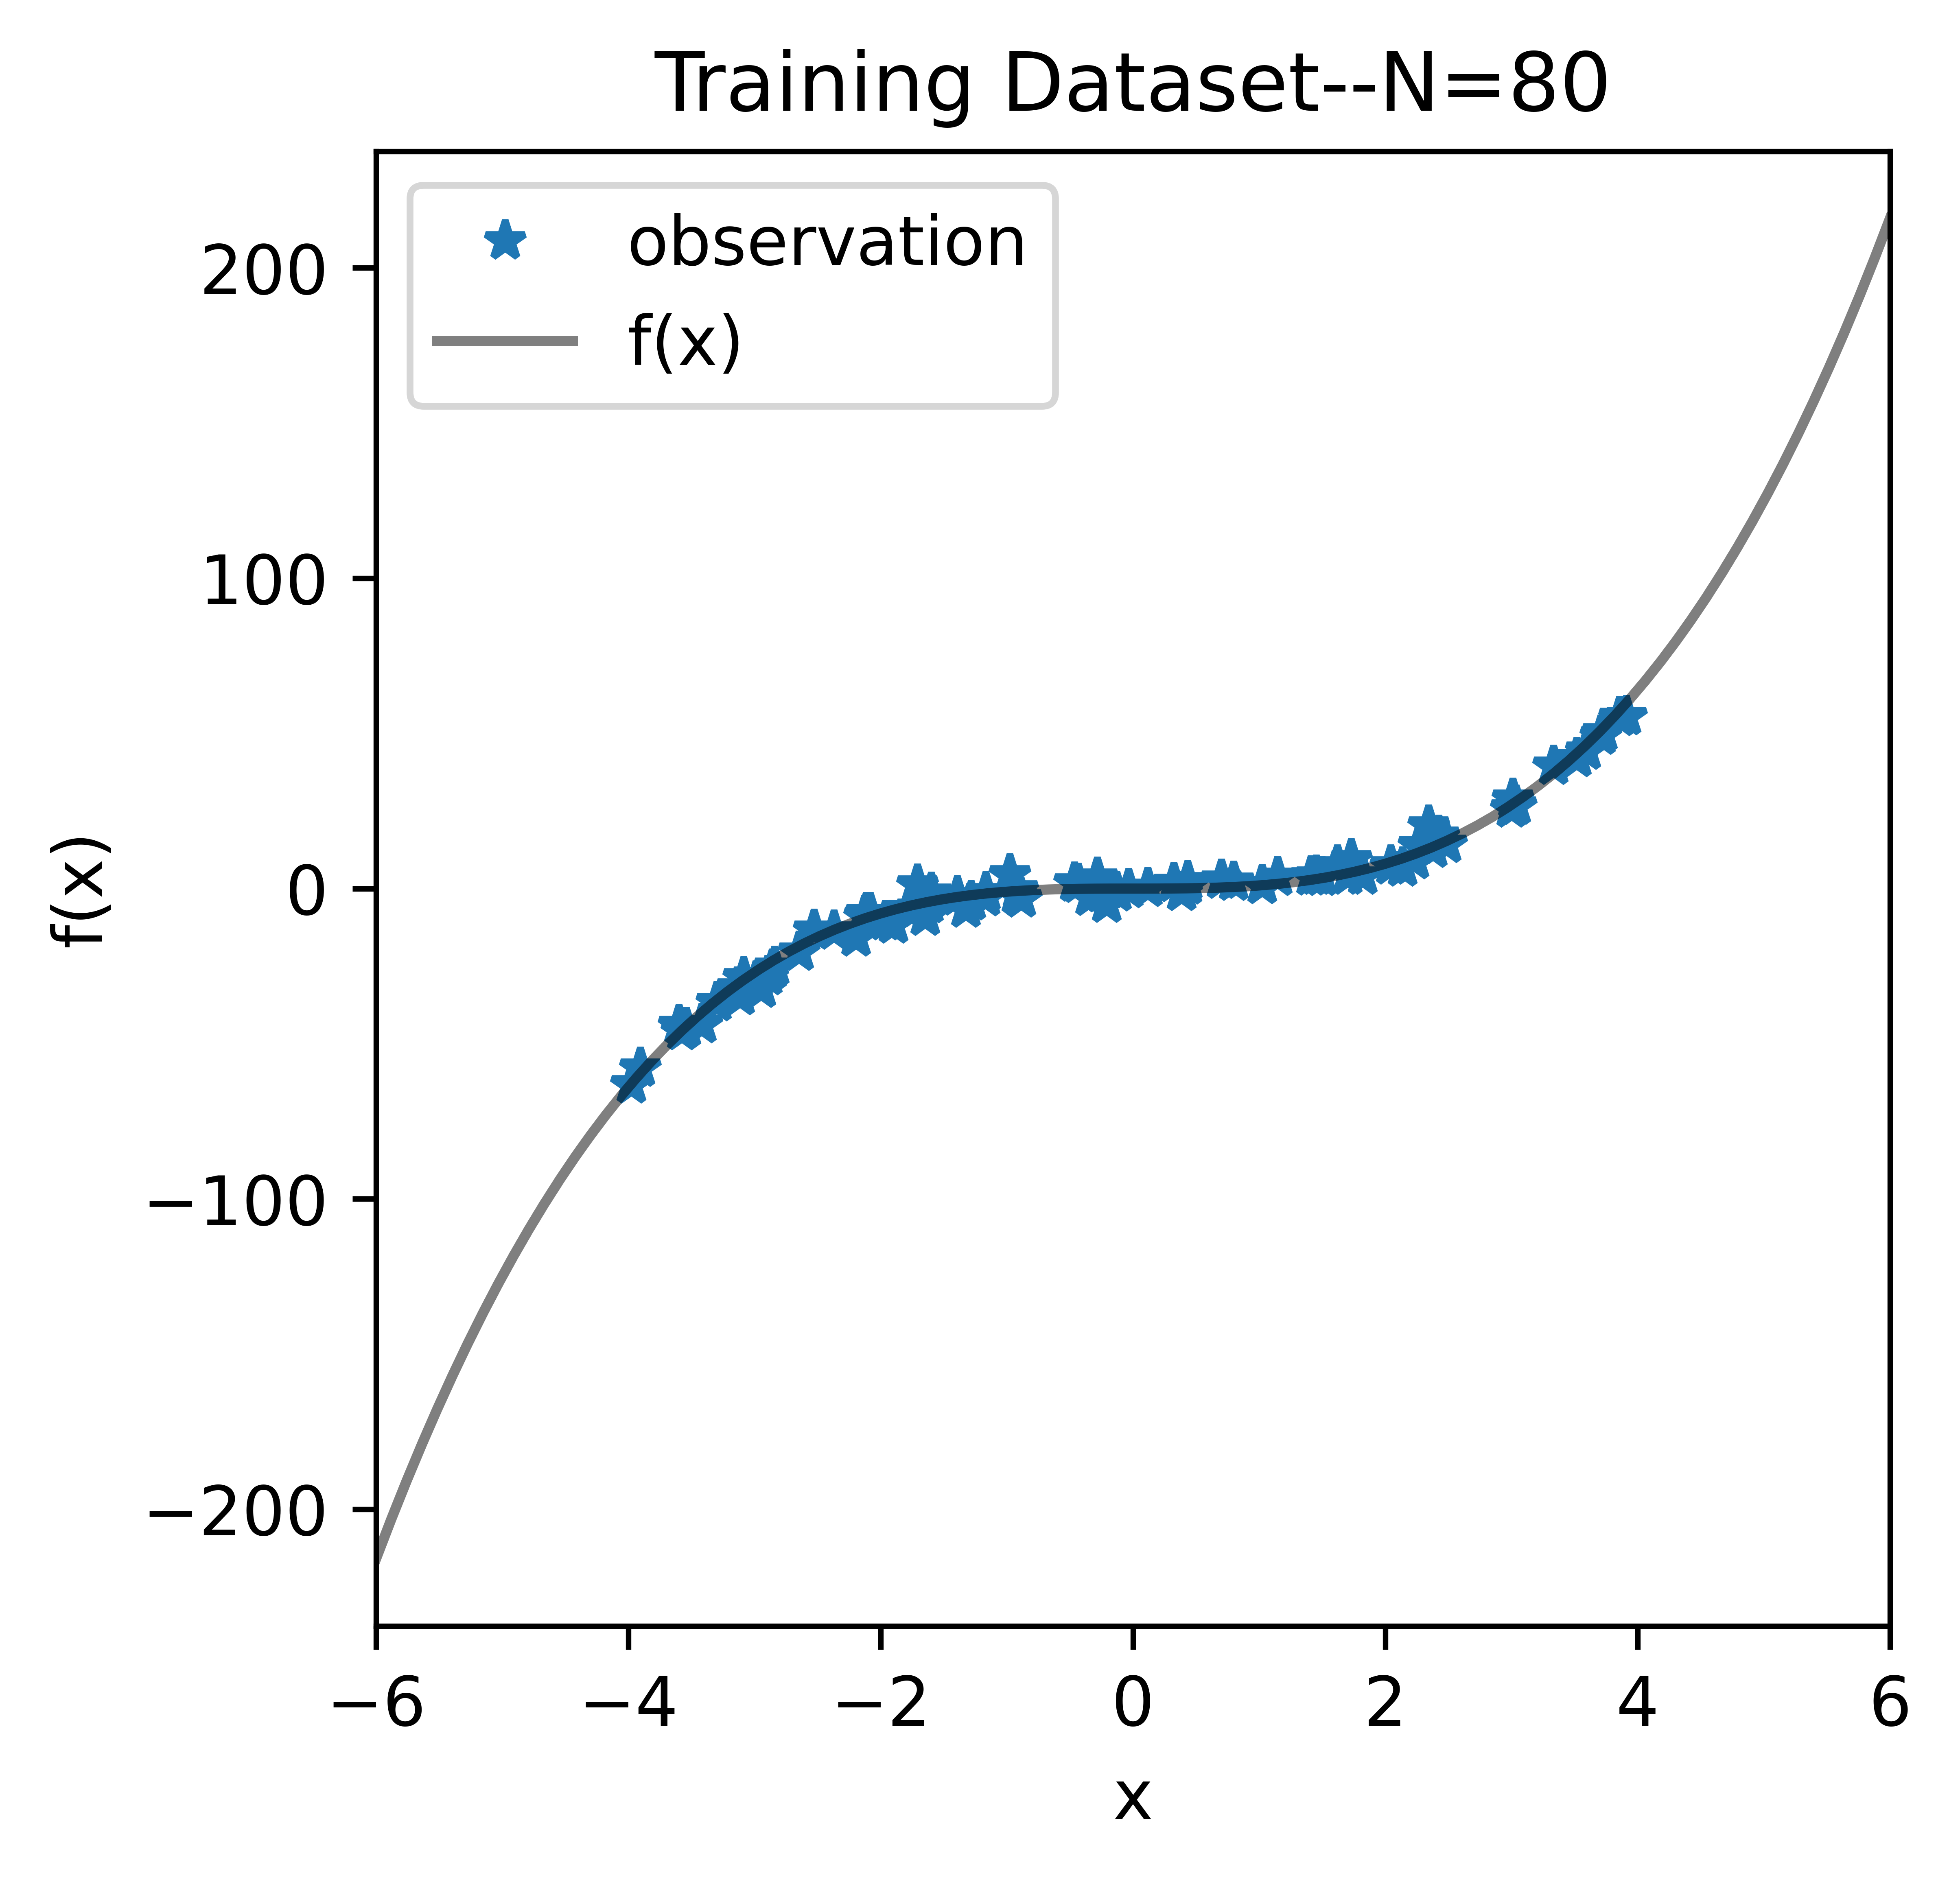

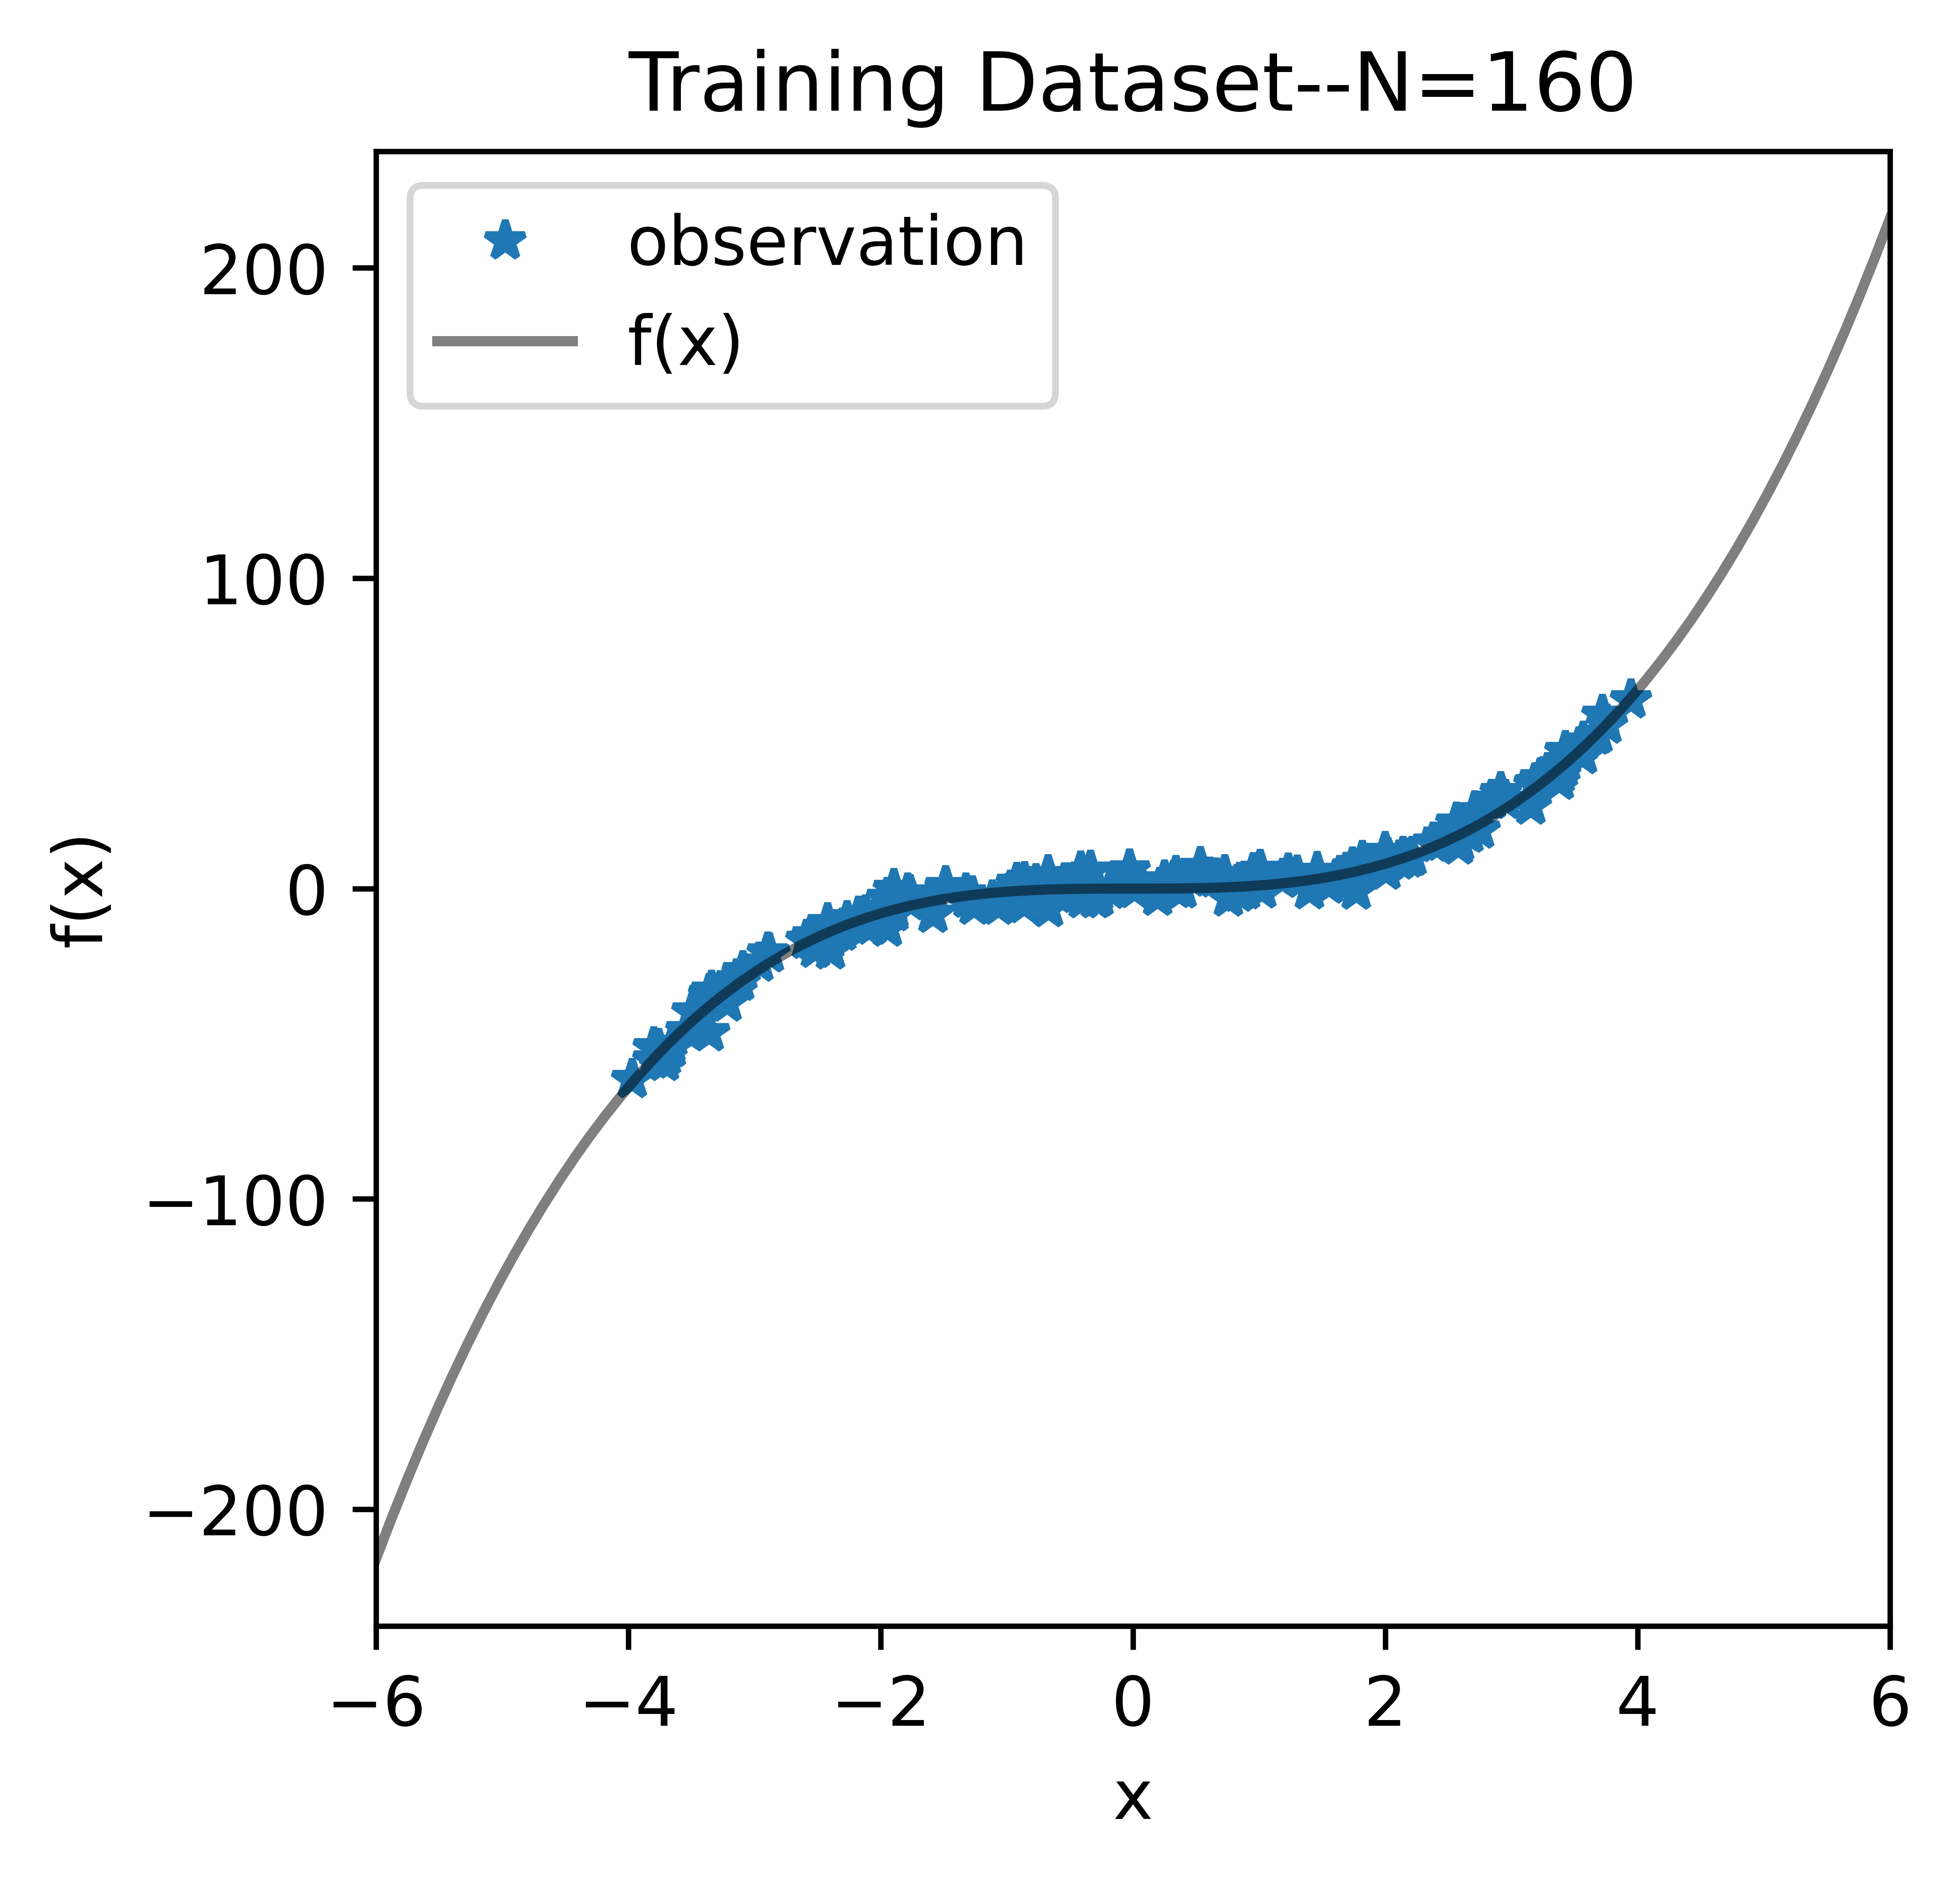

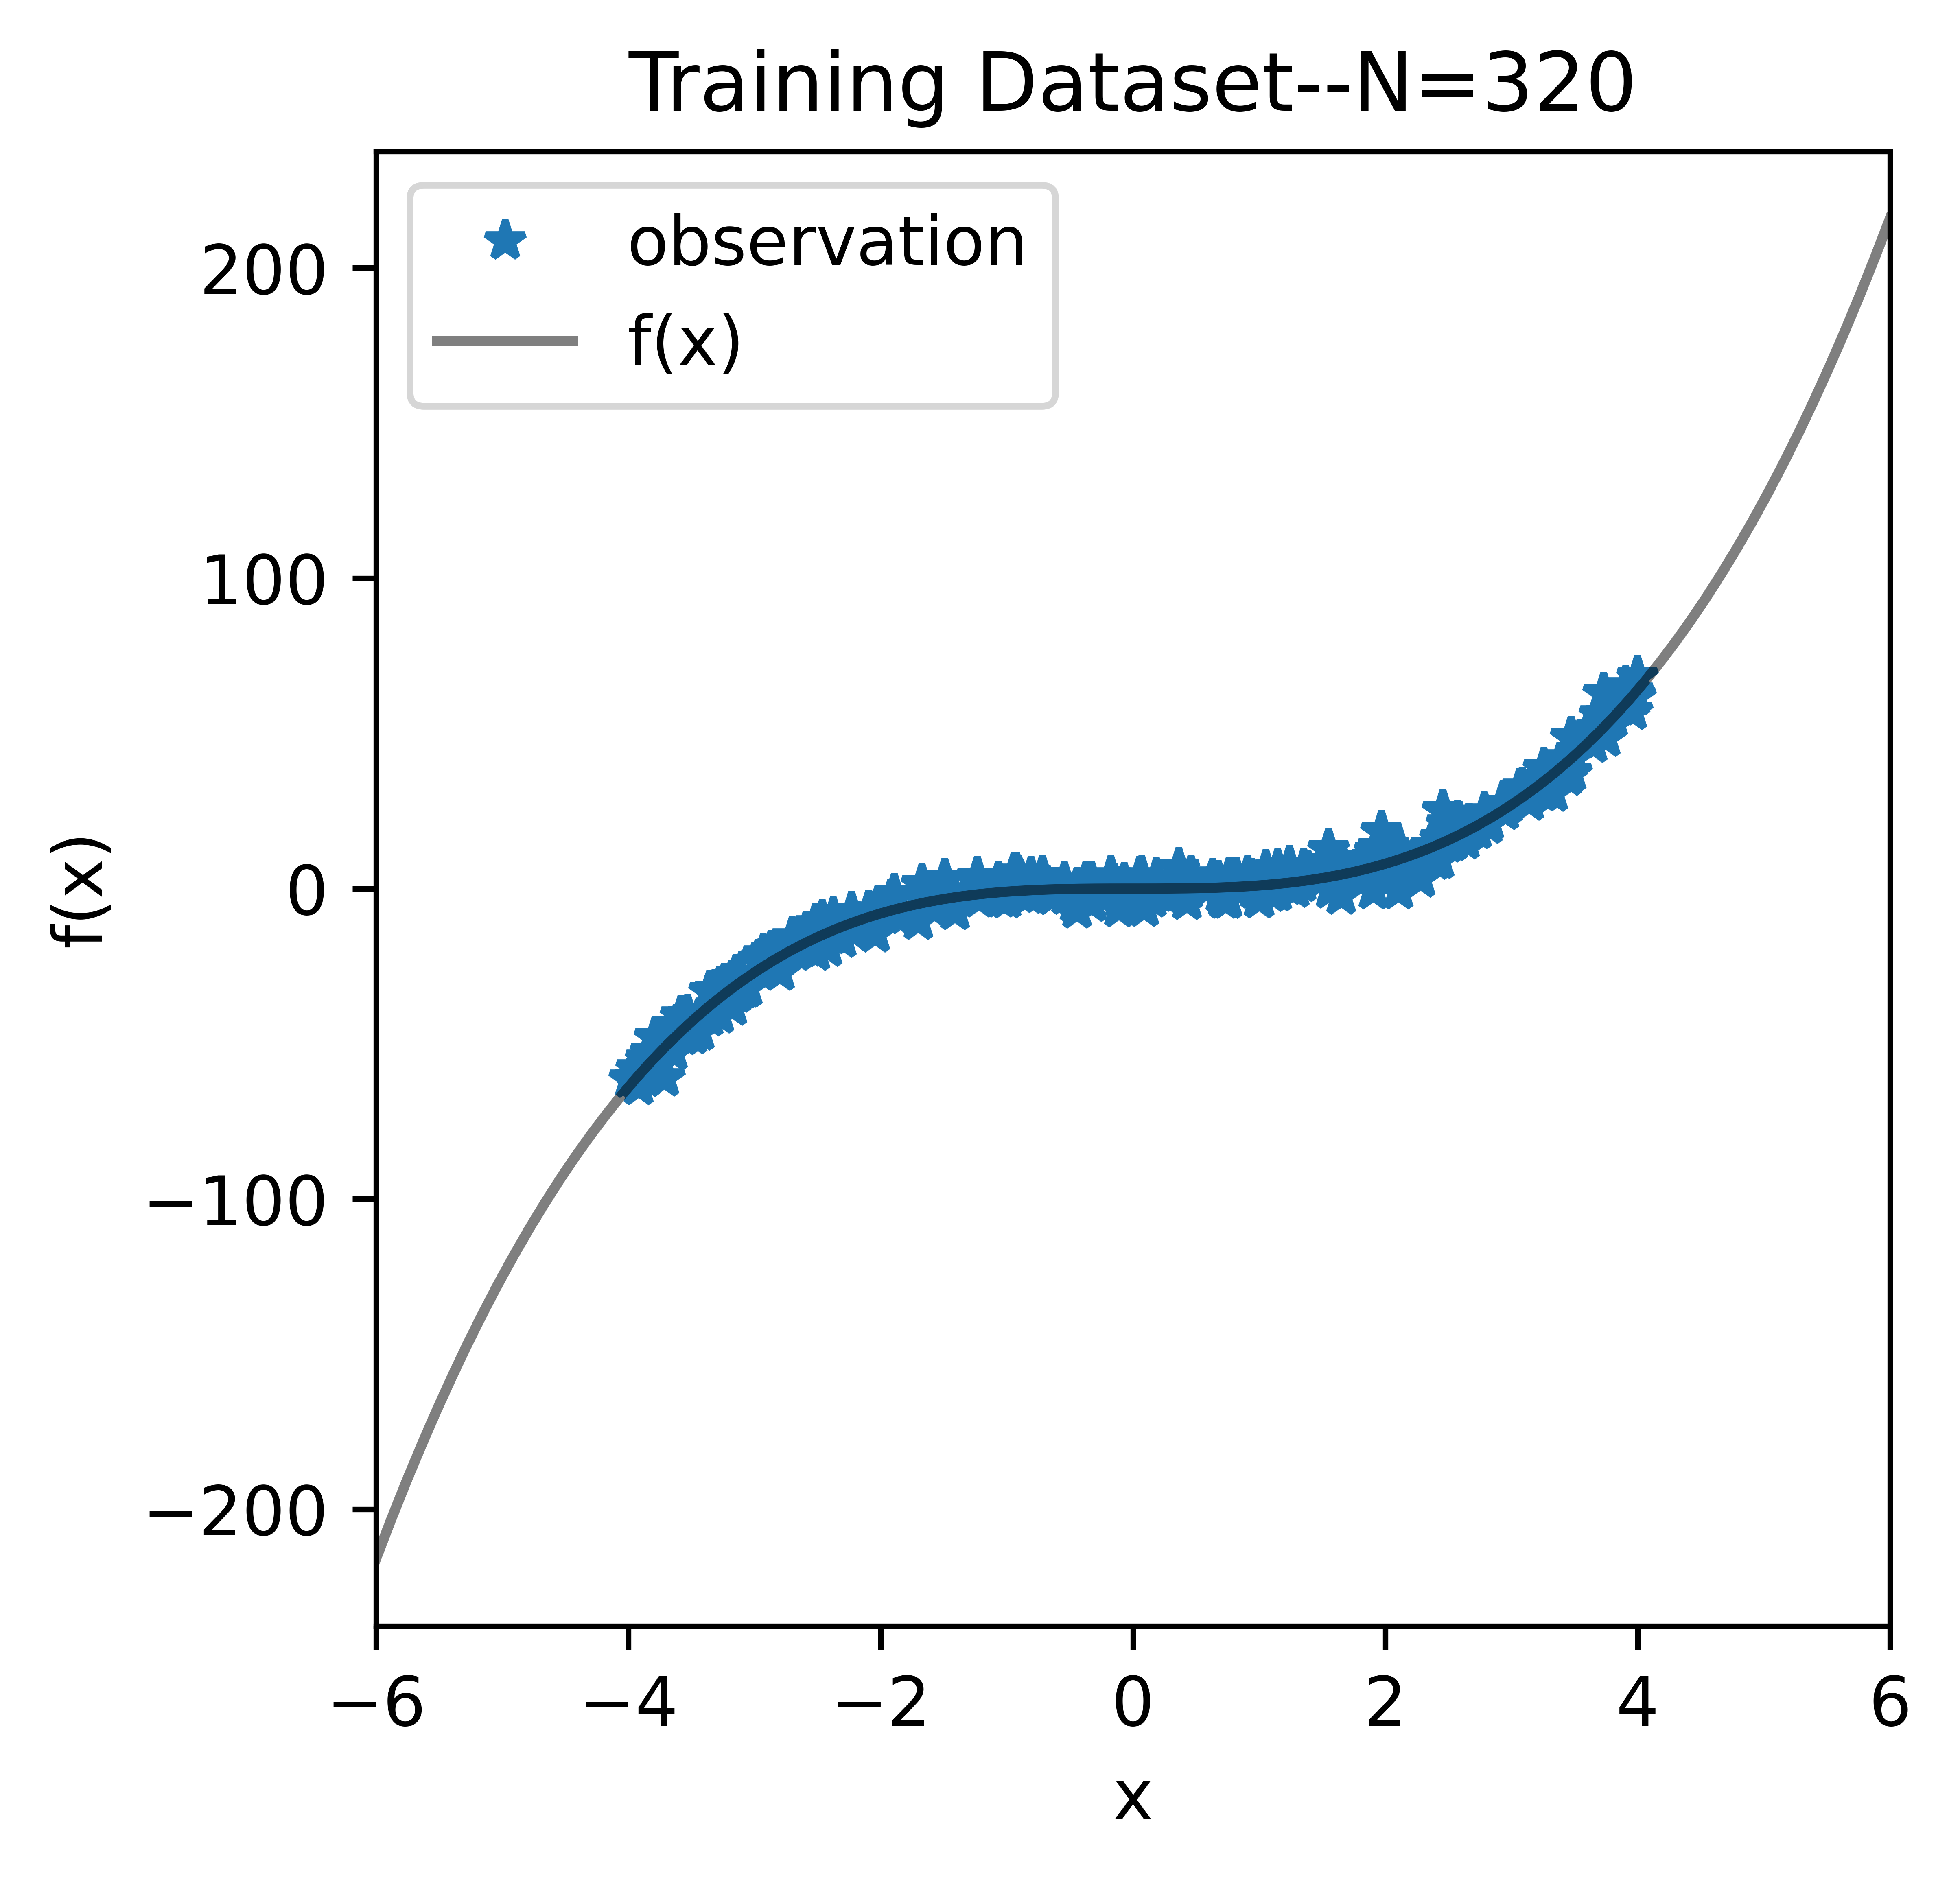

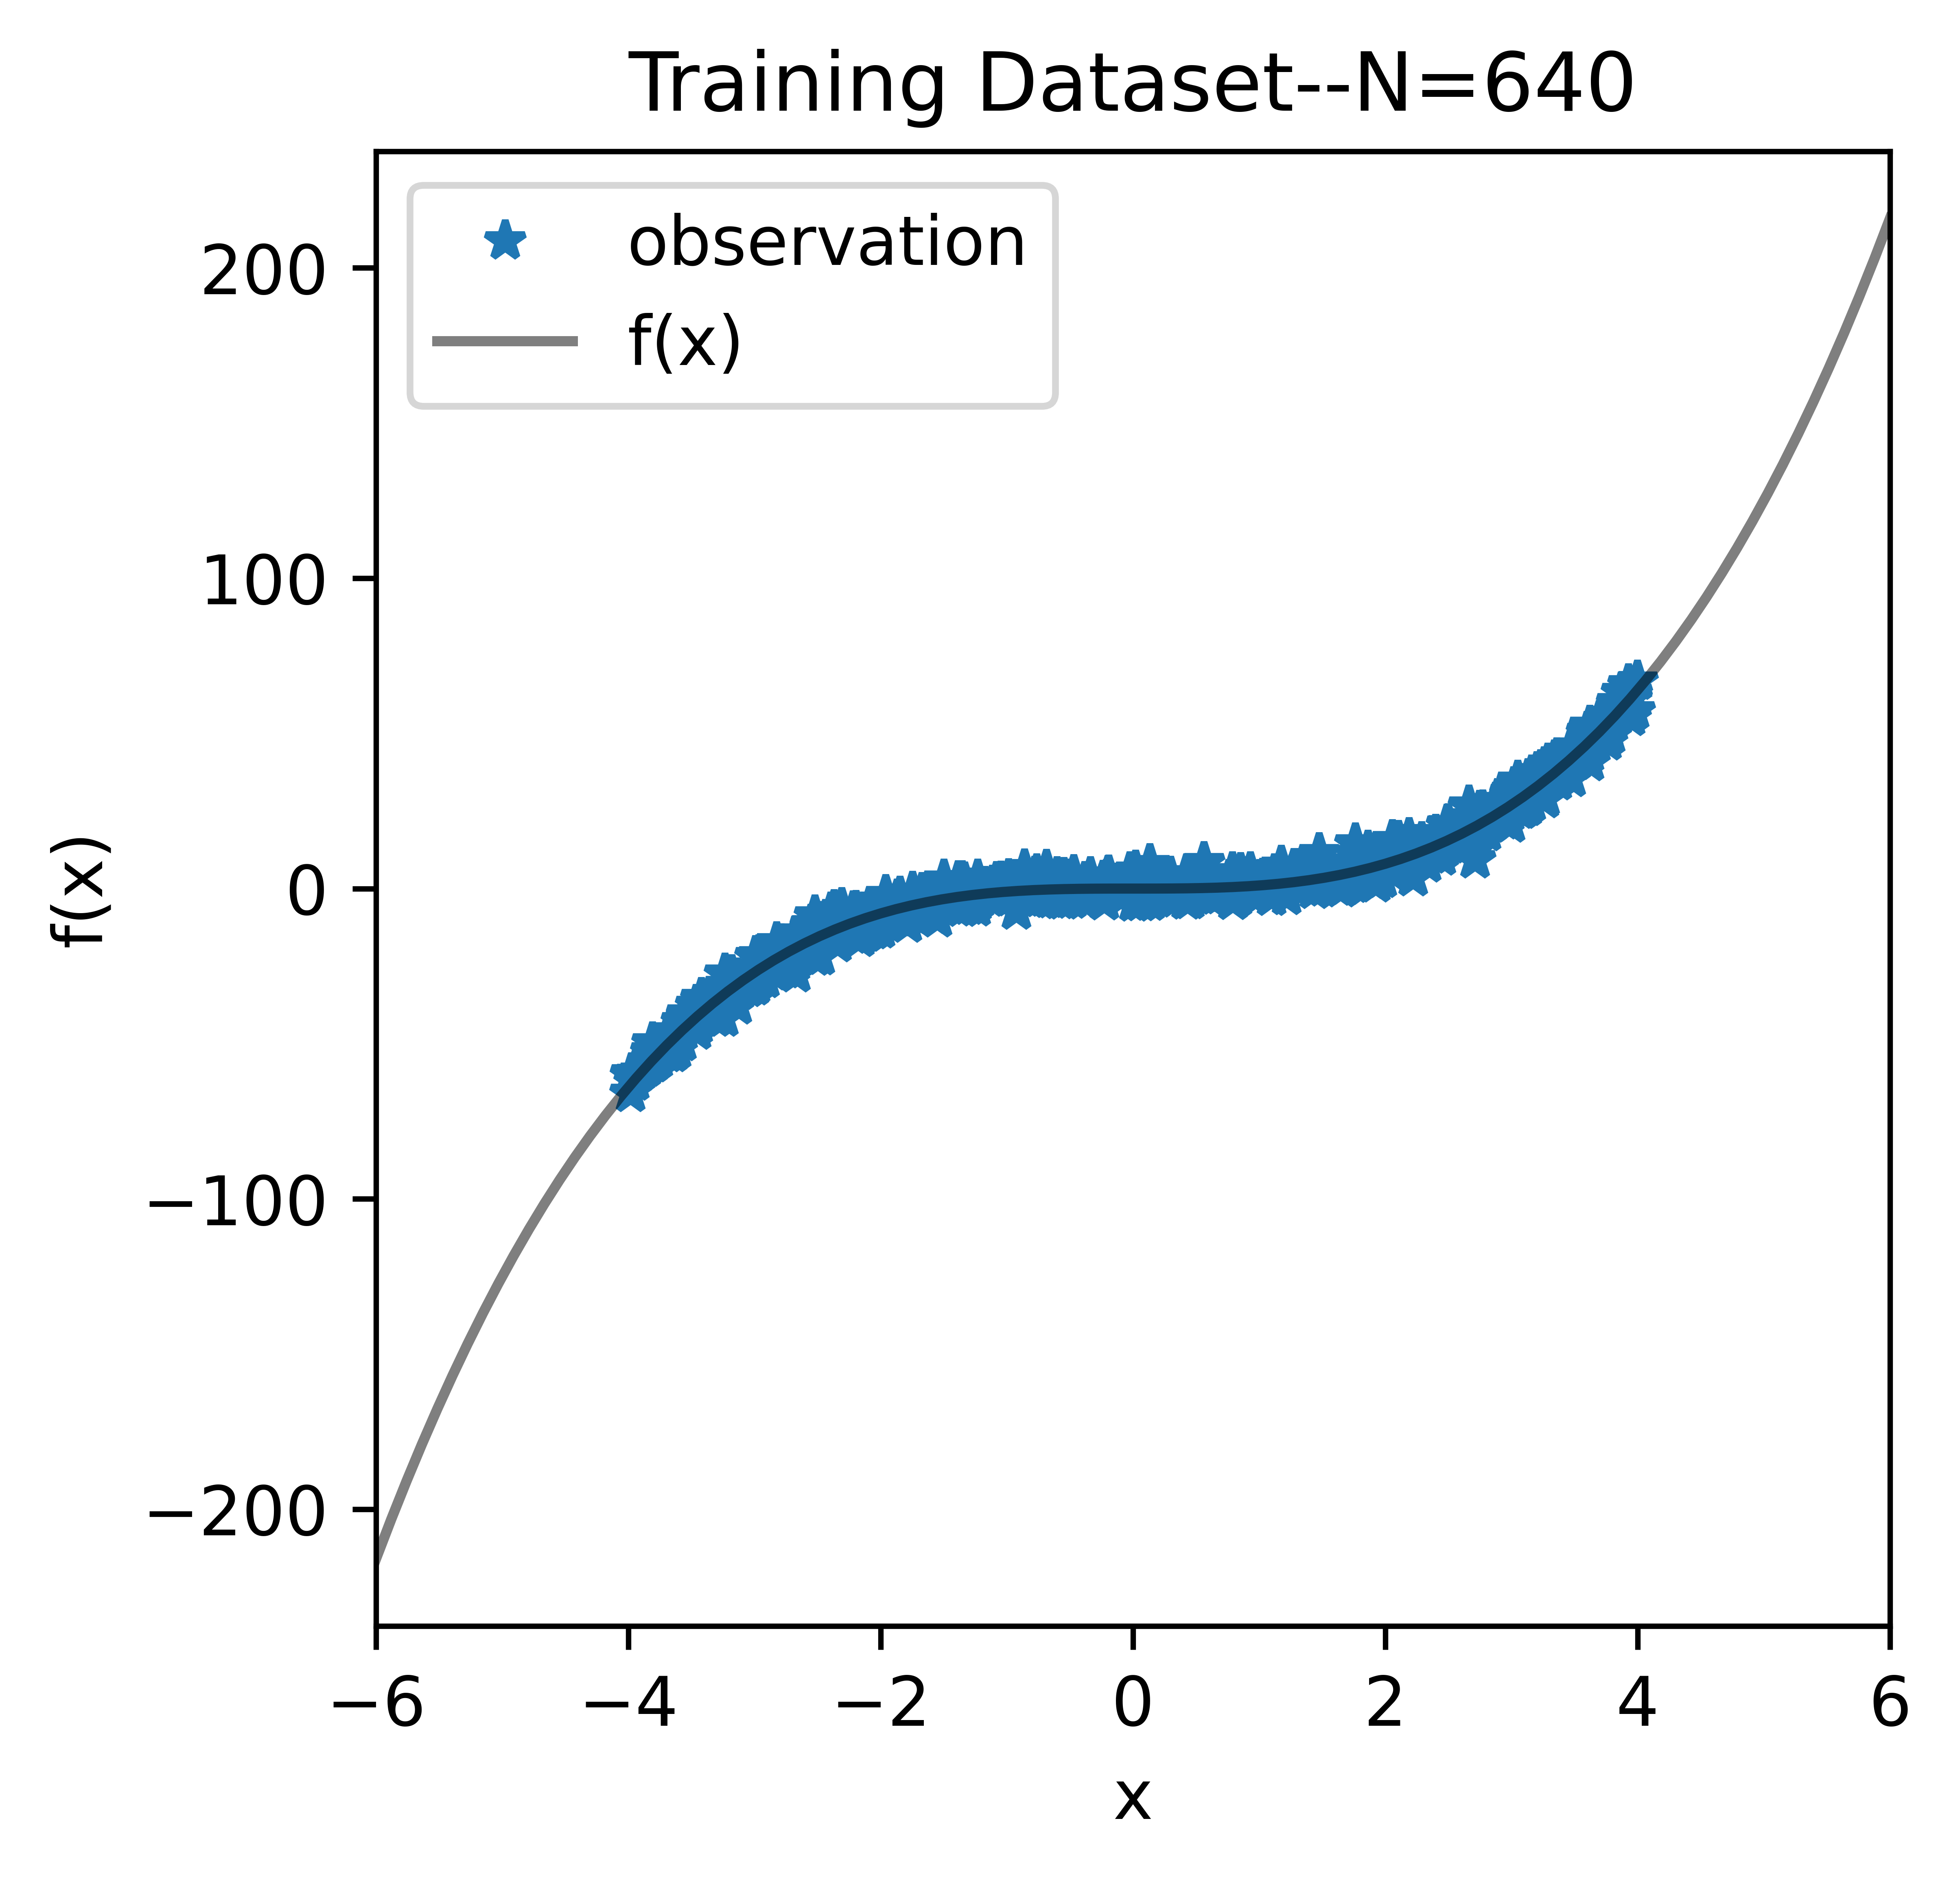

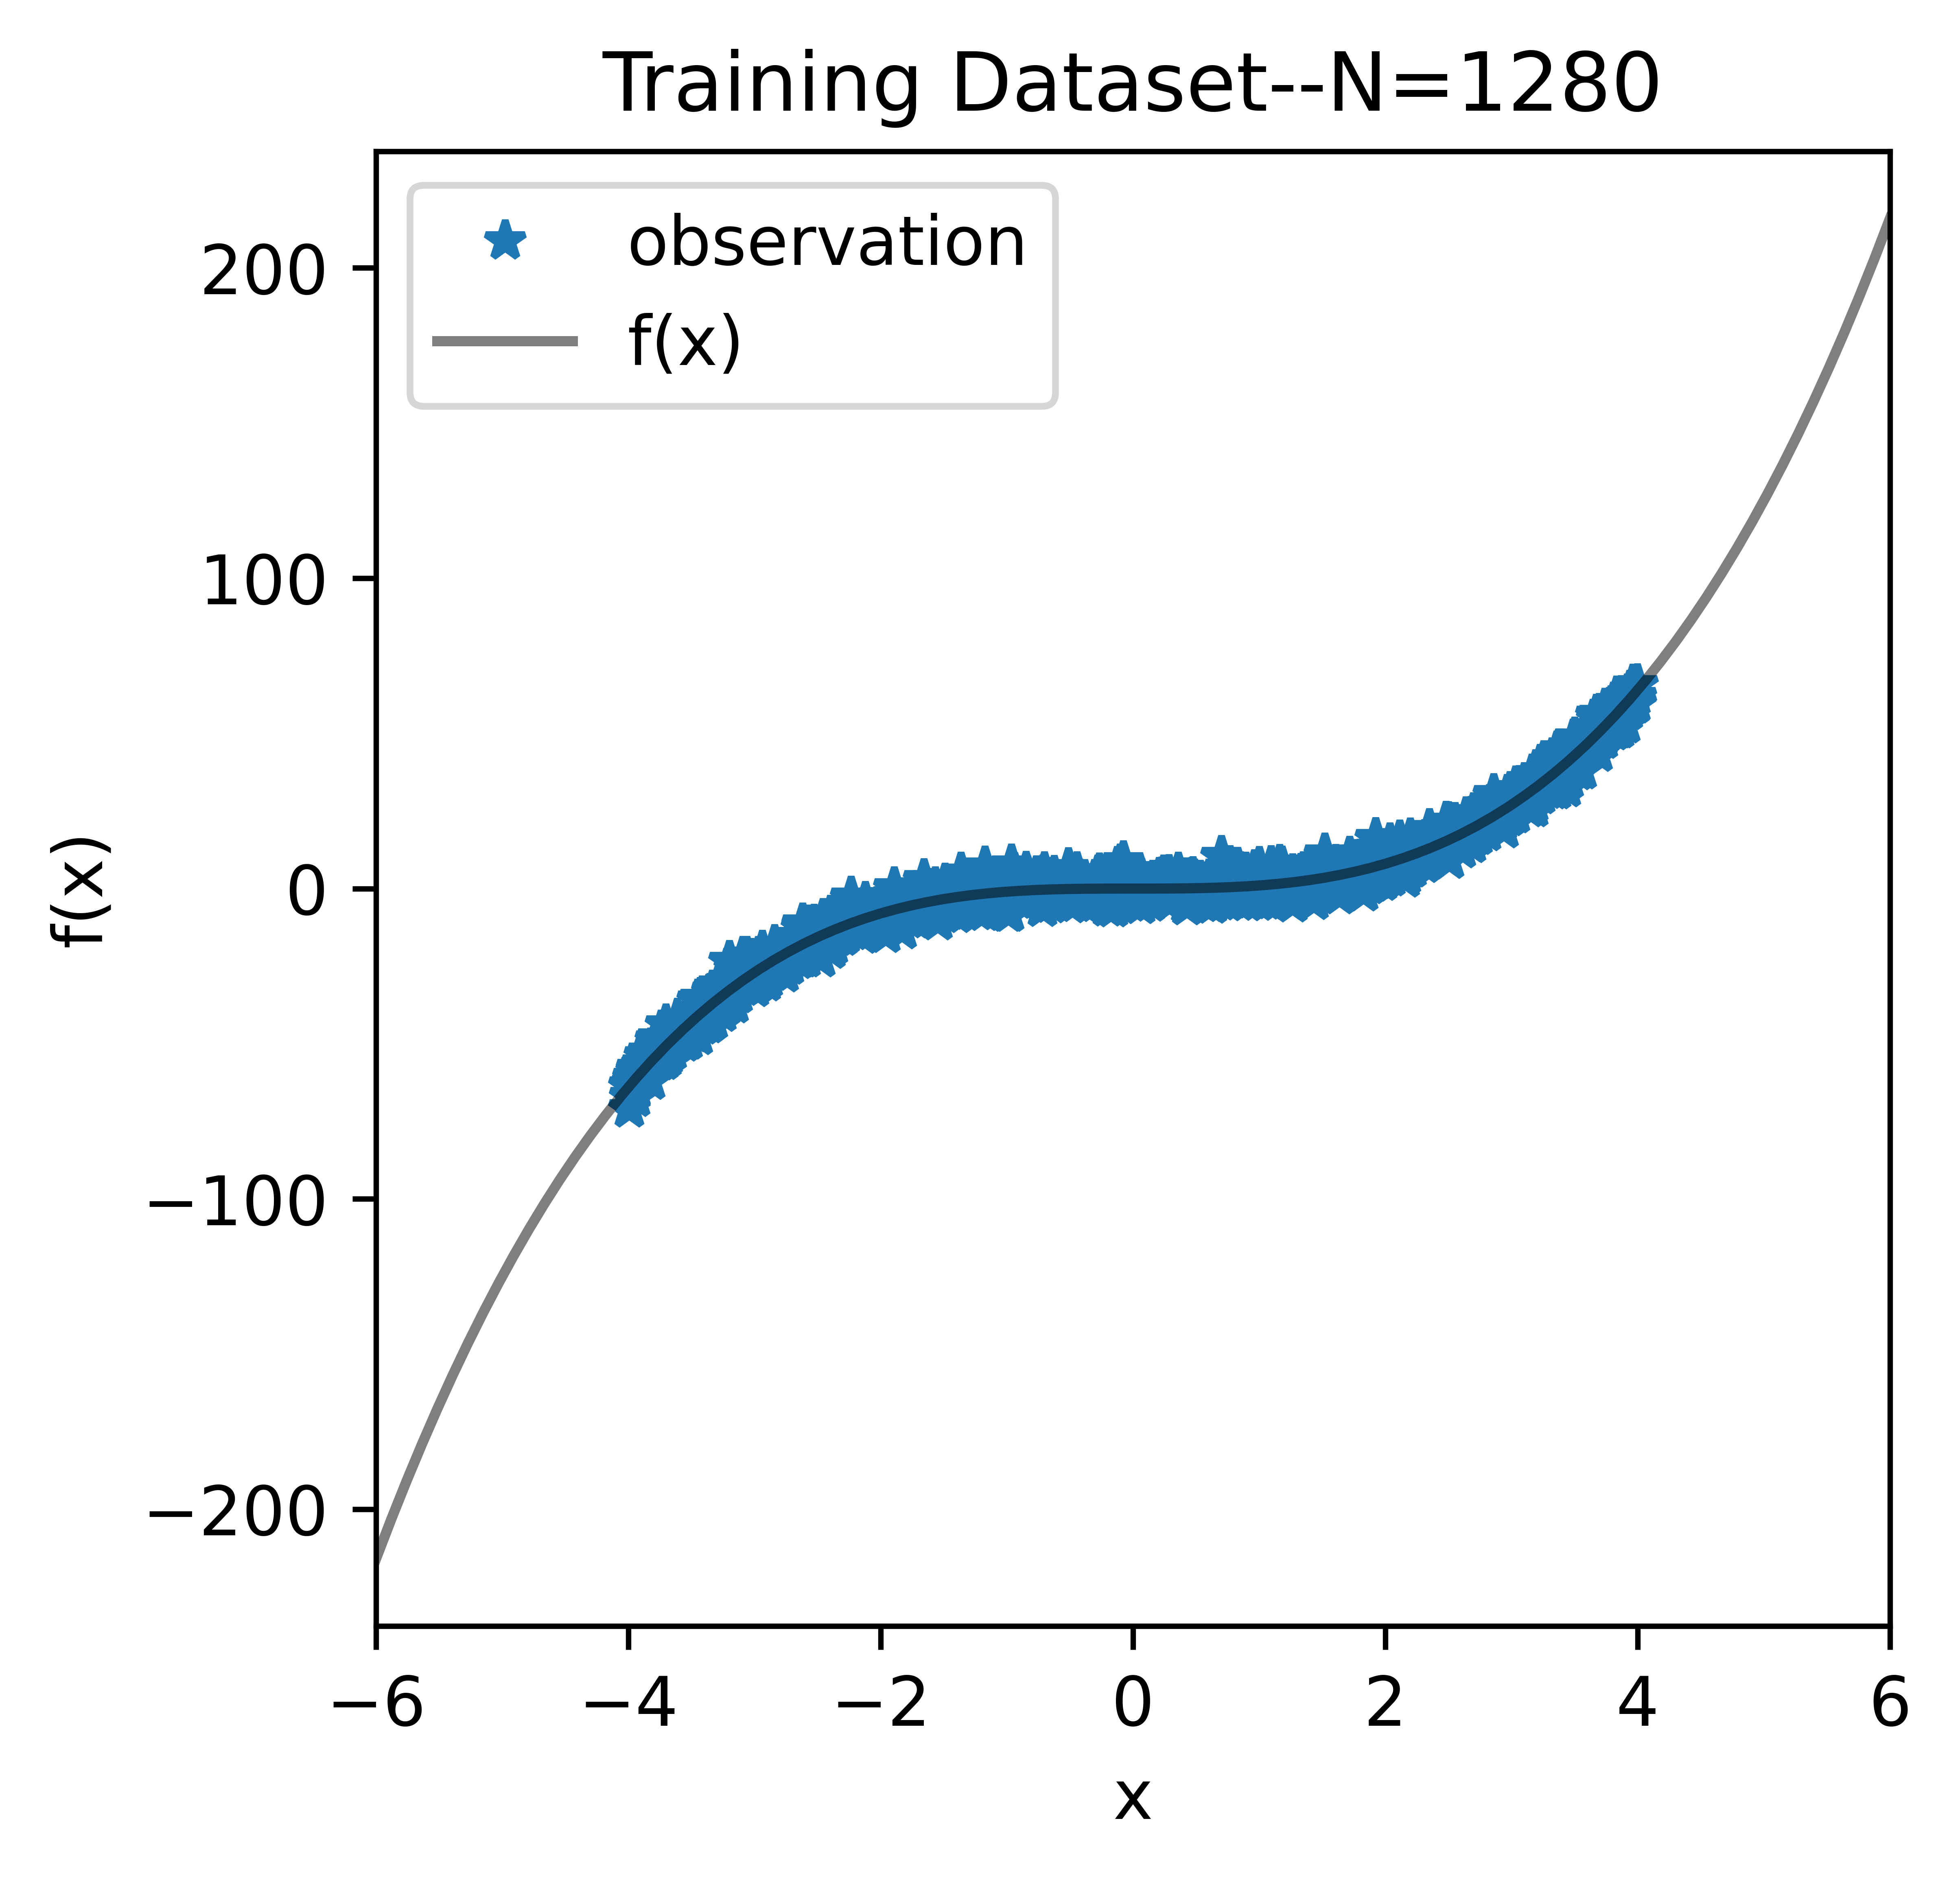

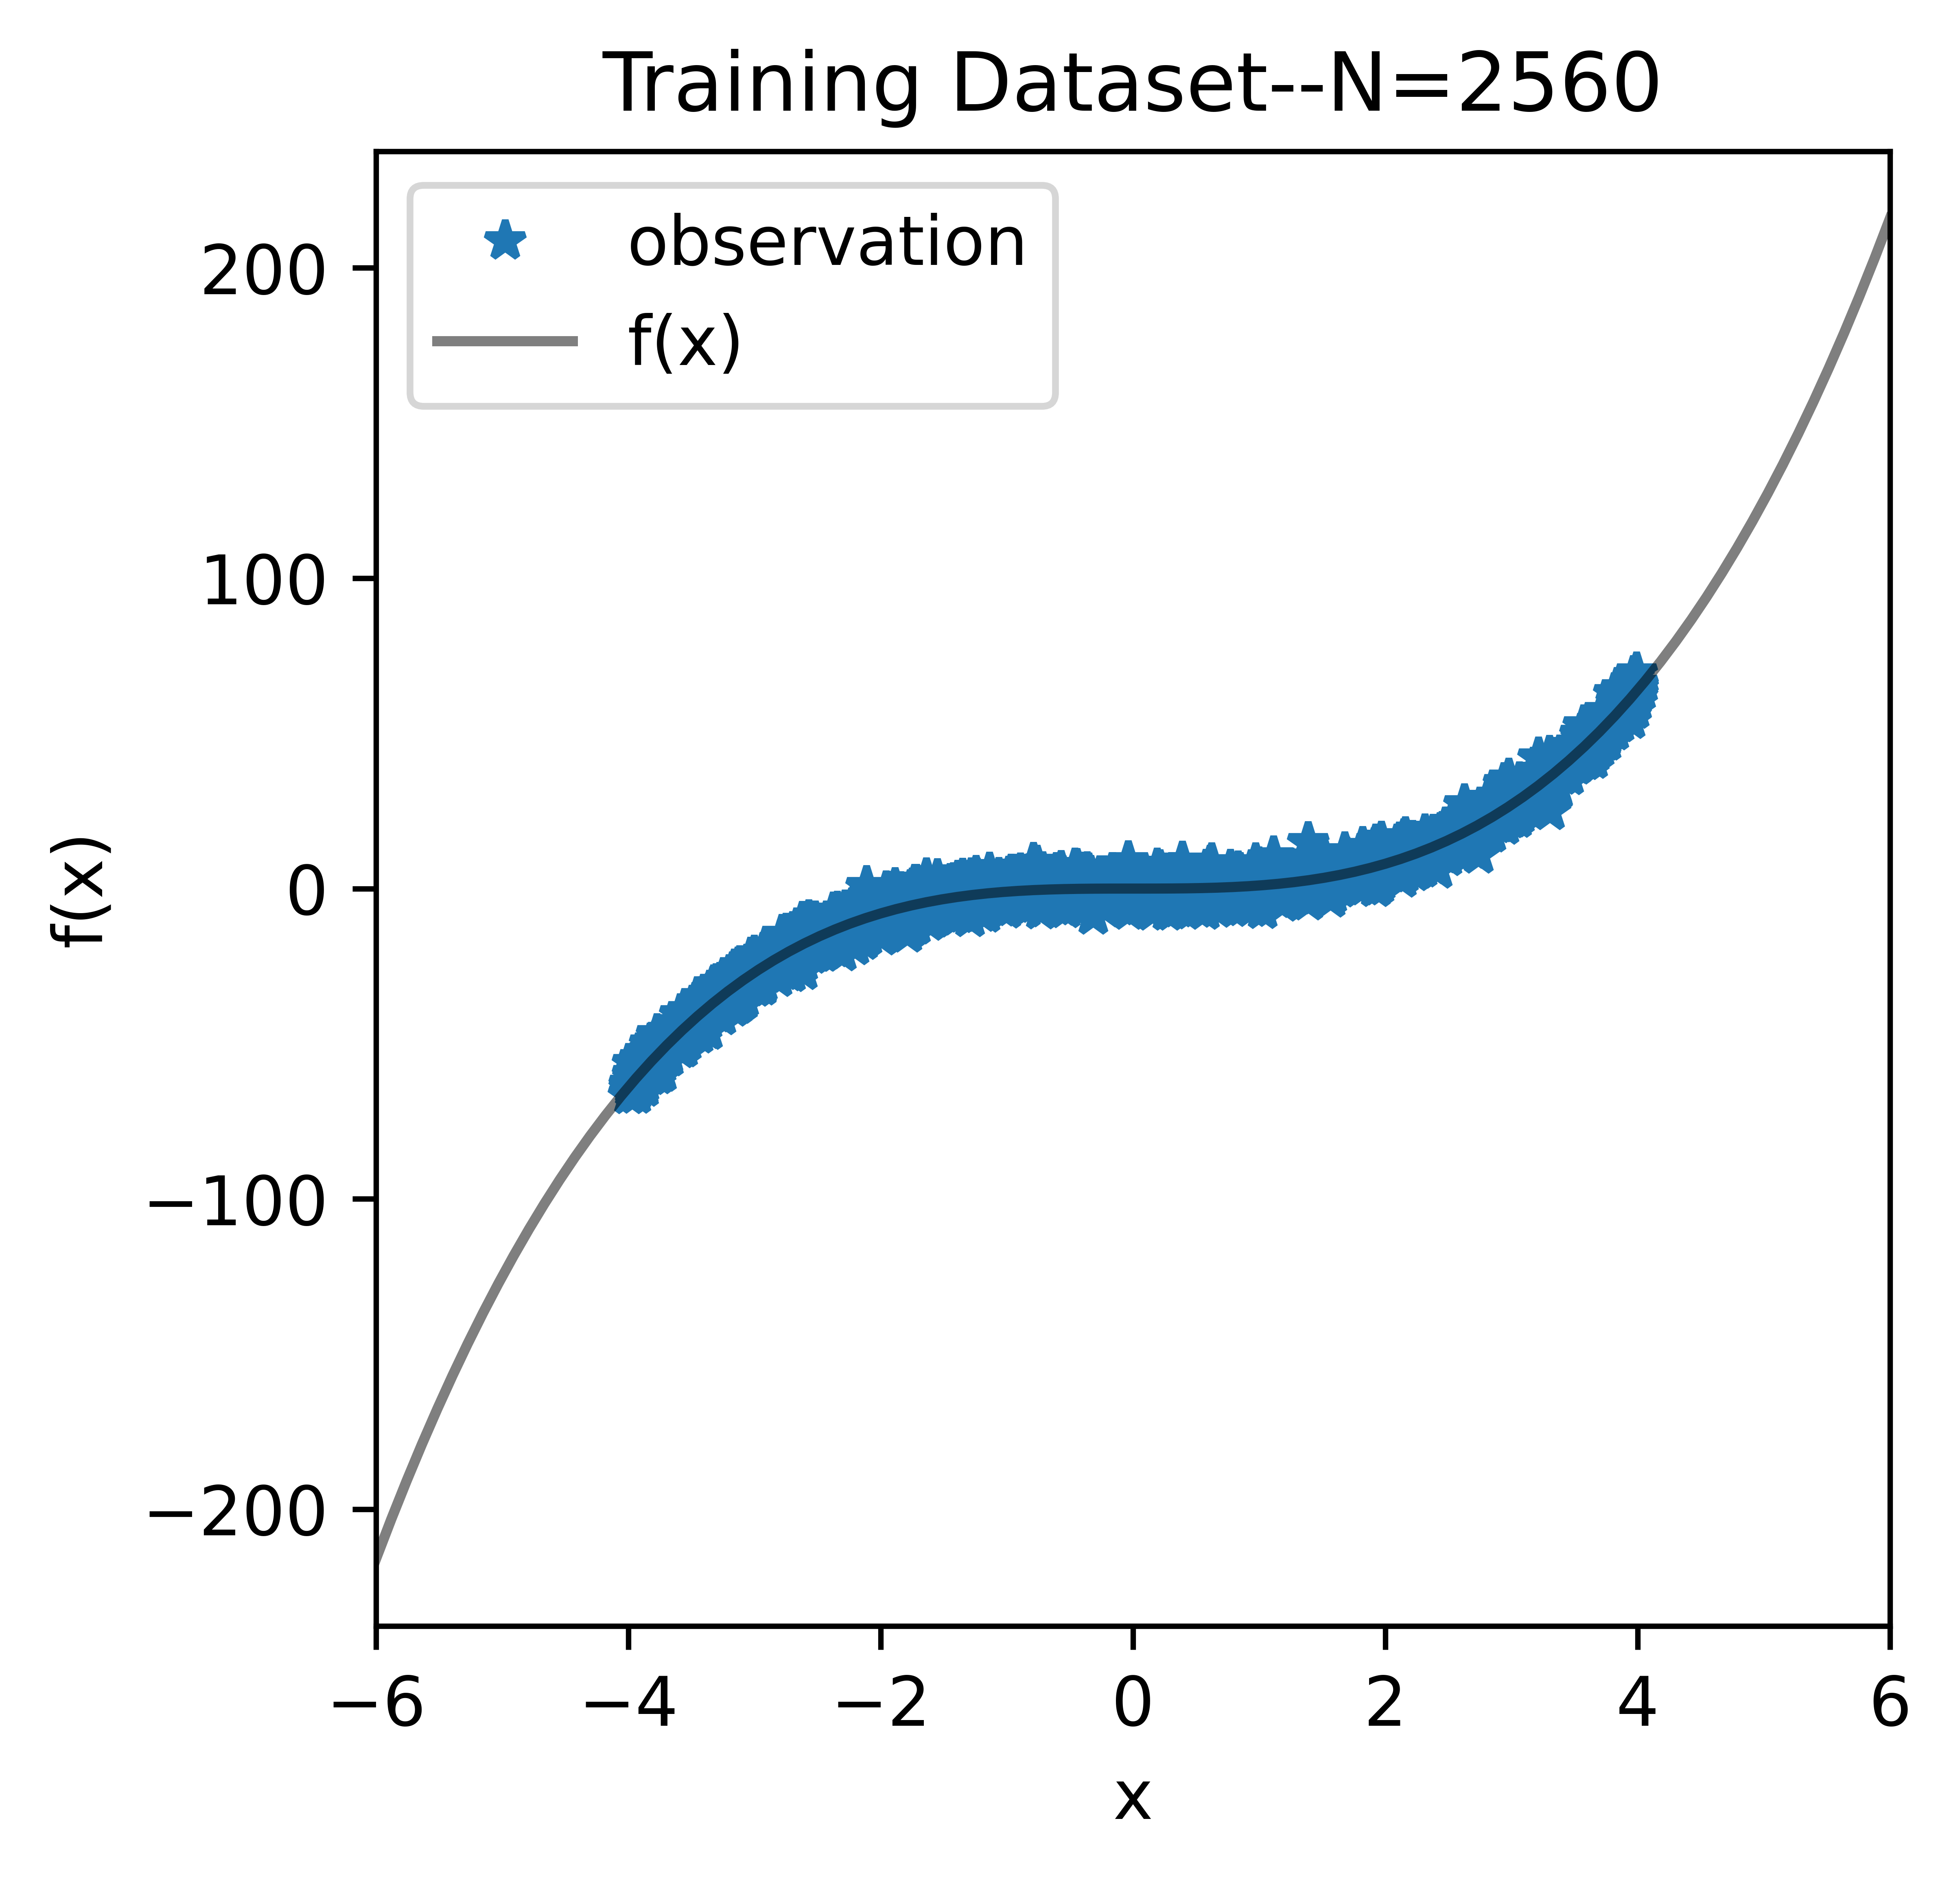

In [13]:
# Illustrate training datasets

for Ndata_train in Ndata_train_list:
    dict_fpath = datadir+'traindata_dict_'+str(Ndata_train)+'.pickle'
    with open(dict_fpath,'rb') as file:
        traindata_dict = pickle.load(file)
        
    X, Y, Y_gt = traindata_dict['X'],traindata_dict['Y'], traindata_dict['Y_gt']
    fig = plt.figure(dpi=1200,figsize=(4,4))
    plt.plot(X, Y,'*', label='observation')
    plt.title('Training Dataset'+'--'+'N='+str(Ndata_train))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xlim([-6,6])

    plt.plot(x, y, 'k', label='f(x)', alpha = 0.5)
    plt.legend()
    plt.show()
